# MALL_CUSTOMER
## Problem Statement
### Identify specific groups of customers who are most likely to make purchases, provide clear insights to our marketing team, and Recommendations that will help them create effective strategies to attract and convert these customers into loyal shoppers.
* Identify specific customer segments based on age, income, gender, and spending behavior.* Analyze the relationship between demographic factors (age, gender, income) and spending scores
* Develop targeted marketing strategies to attract and retain customers within each identified segment
* Optimize product placement and promotional campaigns based on customer segmentation spending patterns

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

# visualization librarry
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data modelling library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import k_means, dbscan, KMeans

# statistical analysis libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
# import your data file
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### Data wrangling and Data Cleaning

In [4]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [9]:
# Group age column in 3 group using list comprehension

data['Age_group'] = ['youth' if x <=34 else 'adult' if x <=51 else 'old' for x in data ['Age']]
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group  
0     youth  
1     youth  
2     youth  
3     youth  
4     youth

## EXPLORATORY DATA ANALYSIS (EDA)

## why visualize the Data
* I want to see how different catergories groups behave and understand the differences

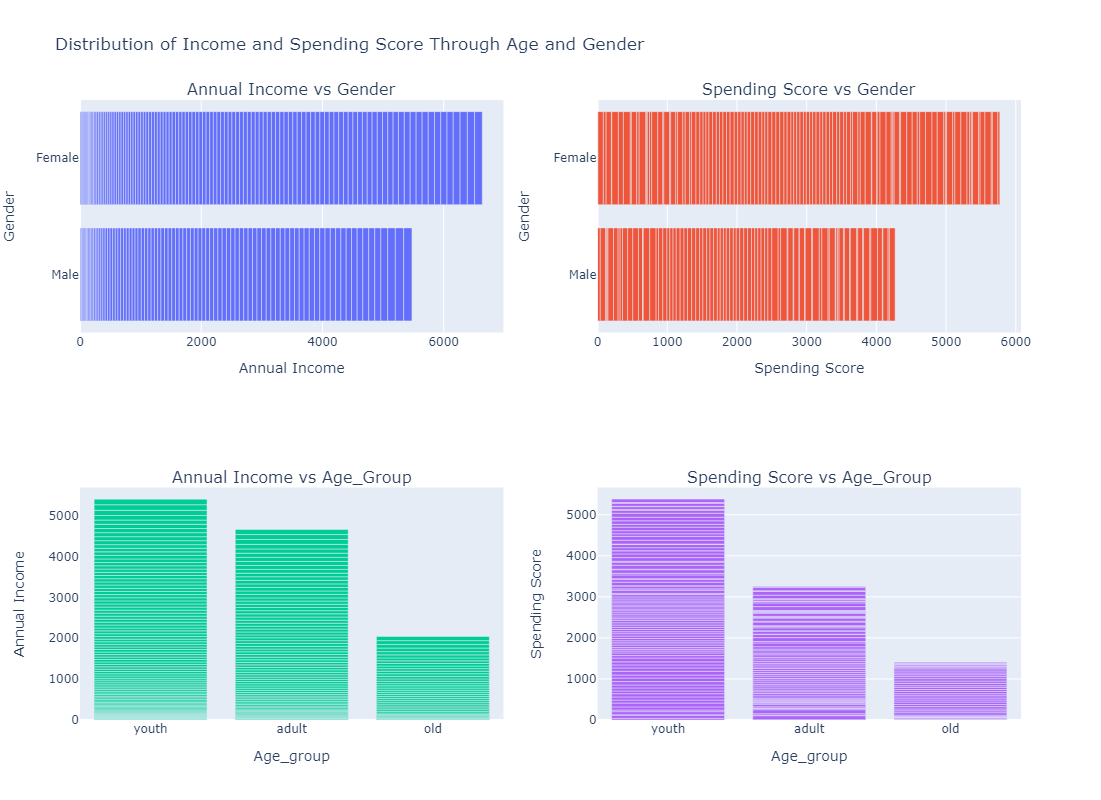

In [10]:
# Initialize figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Annual Income vs Gender',
                                                    'Spending Score vs Gender',
                                                    'Annual Income vs Age_Group',
                                                   'Spending Score vs Age_Group'))
# Add traces
fig.add_trace(go.Bar(x=data['Annual Income (k$)'], y=data['Gender'], orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(x=data["Spending Score (1-100)"], y=data["Gender"], orientation='h'), row=1, col=2)
fig.add_trace(go.Bar(x=data["Age_group"], y=data["Annual Income (k$)"]), row=2, col=1)
fig.add_trace(go.Bar(x=data["Age_group"], y=data["Spending Score (1-100)"]), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Annual Income", row=1, col=1)
fig.update_xaxes(title_text="Spending Score", row=1, col=2)
fig.update_xaxes(title_text="Age_group", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Age_group", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Annual Income", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="Spending Score", row=2, col=2)

# Update title and height
fig.update_layout(title_text="Distribution of Income and Spending Score Through Age and Gender", height=800, width=1000, showlegend=False)


### Interpretation
* Women earn and spend more money annually compared to men.
* Young people earn and spend more compared to adults and older people, who have the lowest earnings and spending scores

## Matrix plots of your data considered Gender and Age group as a factor
* This is to show different relationships between variables relate to each other

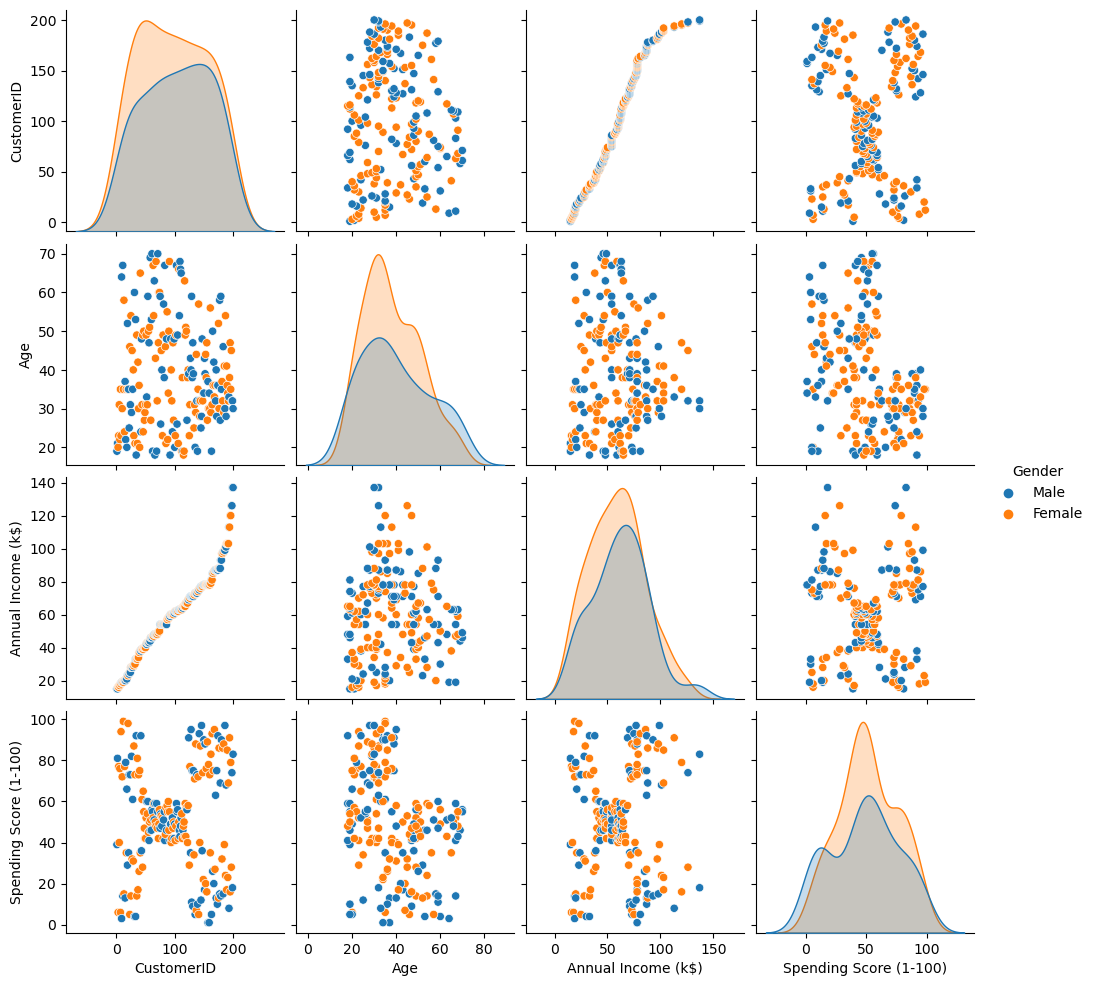

In [11]:
# Gender

sns.pairplot(data,hue="Gender")

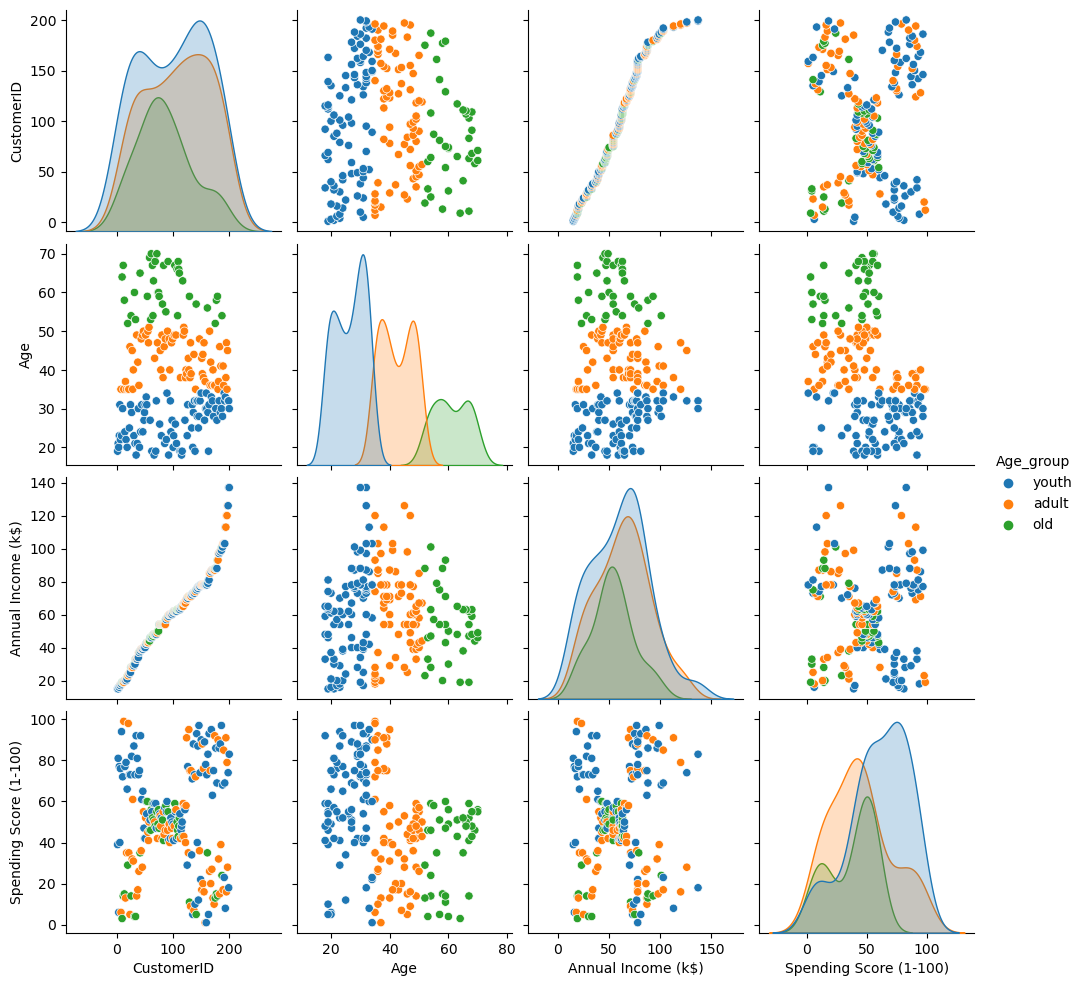

In [12]:
# AGE_GROUP

sns.pairplot(data,hue="Age_group")

# Clustering - Univariate, Bivariate, Multivariate

## Univariate Clustering Analysis
## Annual Income

In [13]:
# Calculate WCSS for different number of clusters
# WCSS = Within-Cluster Sum of Square

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Annual Income (k$)']])
    WCSS.append(kmeans.inertia_)

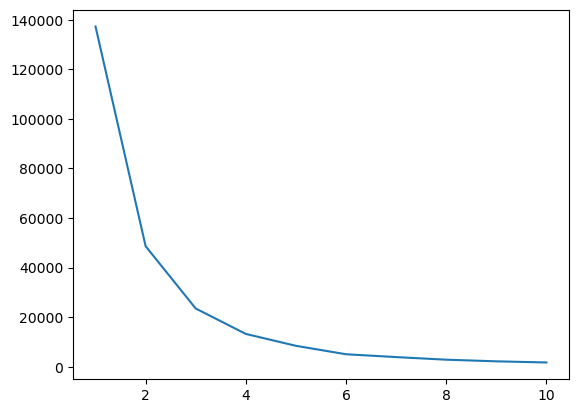

In [14]:
# chossing the number of clusters 
# plot an elbow graph

plt.plot(range(1, 11), WCSS)

# Interpret the eblow graph and findings
* The elbow point on the graph occurred at 3 clusters
* This suggests that dividing the data into 3 clusters
* There are three distinct groups of customers based on their annual income levels

In [15]:
# Traning the KMeans Clustering Model

kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(data[['Annual Income (k$)']])
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Text(0.5, 1.0, 'Clusters by Annual Income')

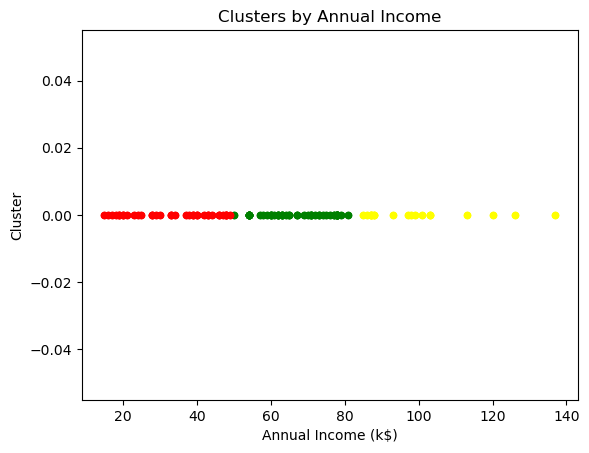

In [16]:
# Create scatter plot for each cluster

plt.scatter(data['Annual Income (k$)'][Y == 0], [0] * sum(Y == 0), s=20, c='green', label='cluster 1')
plt.scatter(data['Annual Income (k$)'][Y == 1], [0] * sum(Y == 1), s=20, c='red', label='cluster 2')
plt.scatter(data['Annual Income (k$)'][Y == 2], [0] * sum(Y == 2), s=20, c='yellow', label='cluster 3')

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Cluster')
plt.title('Clusters by Annual Income')

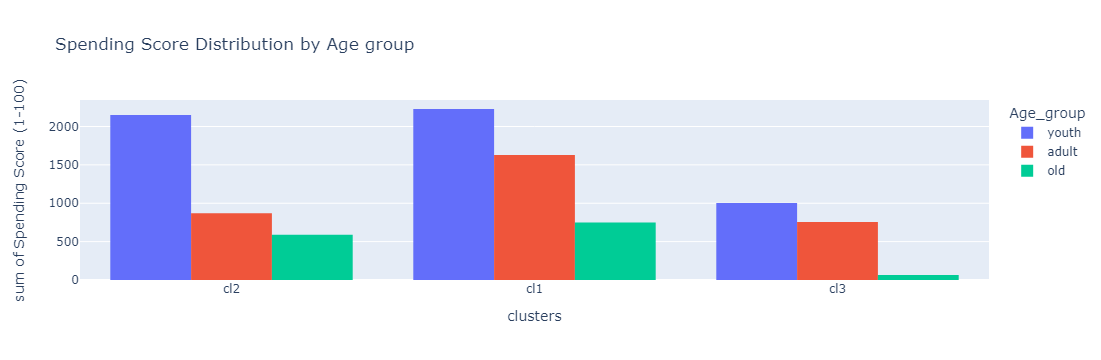

In [17]:
# Assign cluster labels

data['clusters'] = ['cl1' if x == 0 else 'cl2' if x == 1 else 'cl3' for x in Y]

# Visualize the clusters using Plotly

px.histogram(data, x='clusters', y='Spending Score (1-100)',color = 'Age_group', barmode='group', 
                   title="Spending Score Distribution by Age group")

## cluster Interpretation
* In cl2 youth age group has the highest number of customers, followed by the adult age group and then old age group
* cl1 also has a large number of customers in the youth age group, followed by adult age group and then old age group
* In cl3 has the lowest number of customers overall

## Recommendations
* For Cluster 2 and Cluster 1, Tailor marketing strategies and promotions that appeal to each age group's spending because they have a meaningful number of customers across all age groups 

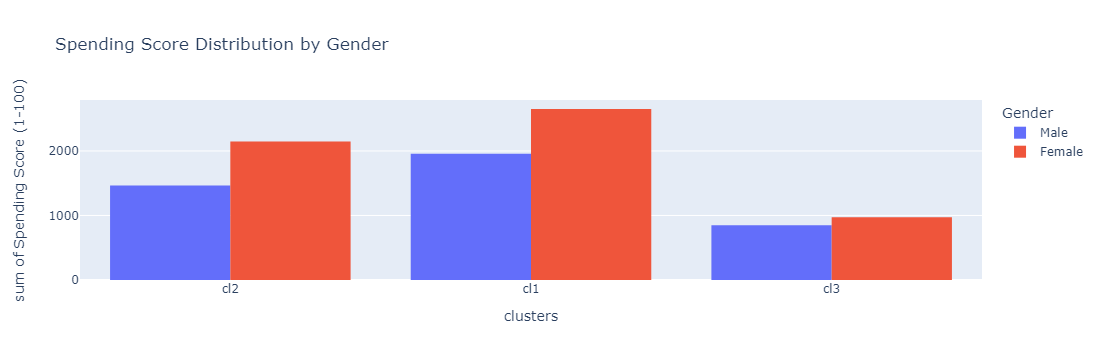

In [18]:
px.histogram(data, x='clusters', y='Spending Score (1-100)',color = 'Gender', barmode='group',
             title='Spending Score Distribution by Gender')

## cluster Interpretation
* In all clusters, there are more female customers than male customers
* Spending scores vary, but the trend of females being more general remains consistent

## Recommendations
* Develop marketing campaigns that are particularly appealing to female customers
* Create promotions and offers that are tailored to both genders

## Spending Score

In [19]:
# Calculate WCSS for different number of clusters
# WCSS = Within-Cluster Sum of Square

WCSS_S = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Spending Score (1-100)']])
    WCSS_S.append(kmeans.inertia_)

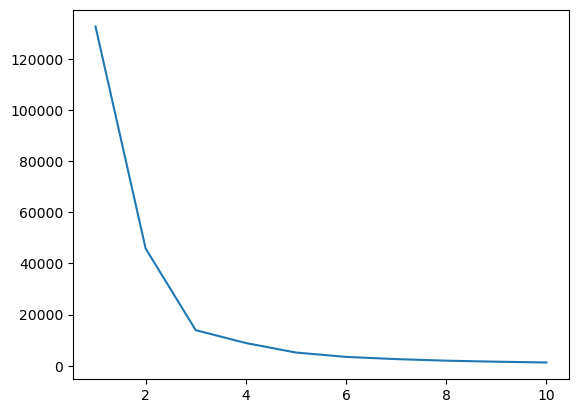

In [20]:
# chossing the number of clusters 
# plot an elbow graph

plt.plot(range(1, 11), WCSS_S)

# Interpret the eblow graph and findings
* The elbow point on the graph occurred at 3 clusters
* This suggests that dividing the data into 3 clusters
* There are three distinct groups of customers based on their Spending Score

In [21]:
# Traning the KMeans Clustering Model

kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
S_Y = kmeans.fit_predict(data[['Spending Score (1-100)']])
print(S_Y)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2 1 2 1 2 0 0 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 0 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


Text(0.5, 1.0, 'Clusters by Spending Score')

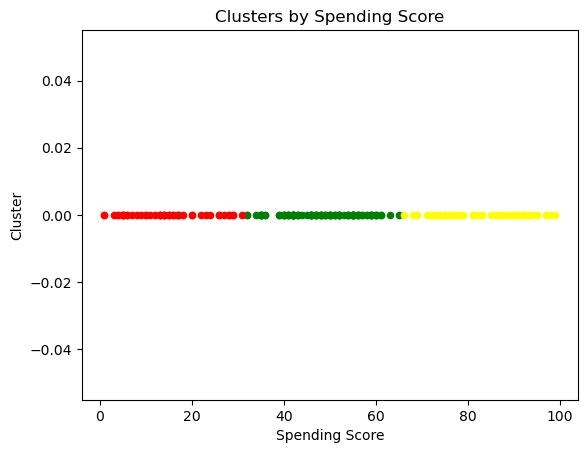

In [22]:
# Create scatter plot for each cluster

plt.scatter(data['Spending Score (1-100)'][S_Y == 0],[0] * sum(S_Y == 0), s=20, c='green', label='cluster 1')
plt.scatter(data['Spending Score (1-100)'][S_Y == 1],[0] * sum(S_Y == 1), s=20, c='red', label='cluster 2')
plt.scatter(data['Spending Score (1-100)'][S_Y == 2],[0] * sum(S_Y == 2), s=20, c='yellow', label='cluster 3')

# Add labels and title
plt.xlabel('Spending Score')
plt.ylabel('Cluster')
plt.title('Clusters by Spending Score')


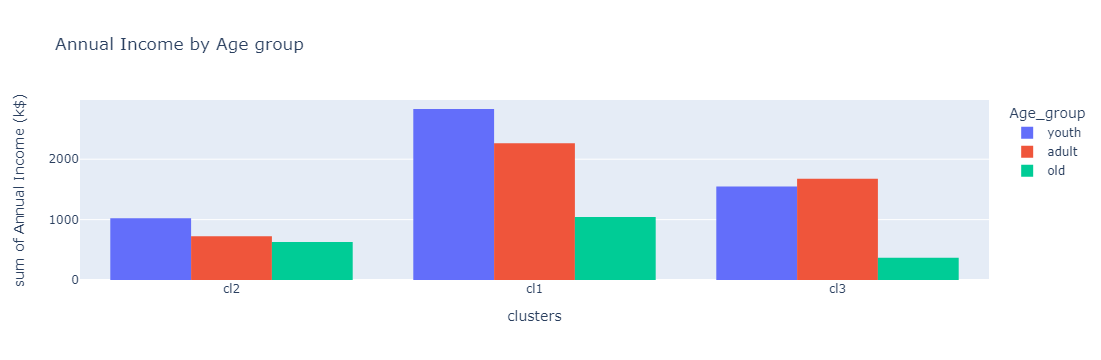

In [23]:
# Assign cluster labels

data['clusters'] = ['cl1' if x == 0 else 'cl2' if x == 1 else 'cl3' for x in Y]

# Visualize the clusters using Plotly

px.histogram(data, x='clusters', y='Annual Income (k$)',color = 'Age_group', barmode='group', 
                   title="Annual Income by Age group")

## Interpretation
* Cluster 2 has the least number of customers in each age group
* Cluster 1 has the largest number of customers across all age groups
* Cluster 3 has higher number of adults compared to youths and a smaller number of older customers.

## Recommendations
* Focus on niche marketing strategies that appeal to each age group in cluster 2
* In cluater 1, Implement loyalty programs and incentives for young customers to keep them engaged and increase their lifetime value.
* In cluster 3 consider promoting products and services that cater to mid_life needs and Target older customers with specialized offers to increase their engagement and spending

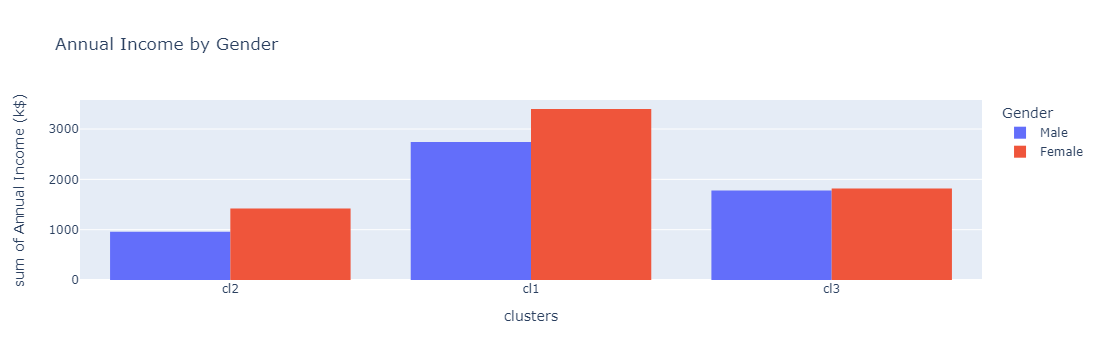

In [24]:
px.histogram(data, x='clusters', y='Annual Income (k$)',color = 'Gender', barmode='group', 
                   title="Annual Income by Gender")

## Interpretation
* cluster 1, Indicating a higher income group.
* Cluster 2, Has the fewest number of customers, with more females than males.
* Cluster 3, Has a nearly equal number of males and females

## Recommendations
* cluster 1, Focus on high-income products and premium services and Create gender-specific marketing campaigns to appeal to both males and females.
* cluster 2, Develop targeted offers to attract more male customers and Promote mid-range products that might appeal to a broader audience.
* Cluster 3, Design inclusive marketing strategies that appeal equally to both males and females. and Offer a variety of products catering to different preferences

# Bivariate Clustering Analysis
## Annual Income (k$), Spending Score (1-100)

In [25]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group clusters  
0     youth      cl2  
1     youth      cl2  
2     youth      cl2  
3     youth      cl2  
4     youth      cl2

In [26]:
df=data[['Annual Income (k$)','Spending Score (1-100)']]
df

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [27]:
# Calculate WCSS for different number of clusters
# WCSS = Within-Cluster Sum of Square

WCSS_df = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    WCSS_df.append(kmeans.inertia_)

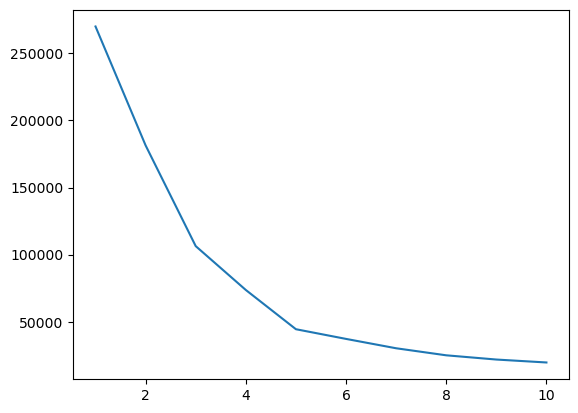

In [28]:
# chossing the number of clusters 
# plot an elbow graph

plt.plot(range(1, 11), WCSS_df)

## Interpret the eblow graph and findings 
* This elbow shows 5 clusters.
* 5 clusters is the optimal number for segmenting the data
* Divide the customers into 5 distinct groups

In [29]:
# Traning the KMeans Clustering Model

kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
A_S= kmeans.fit_predict(df)
print(A_S)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


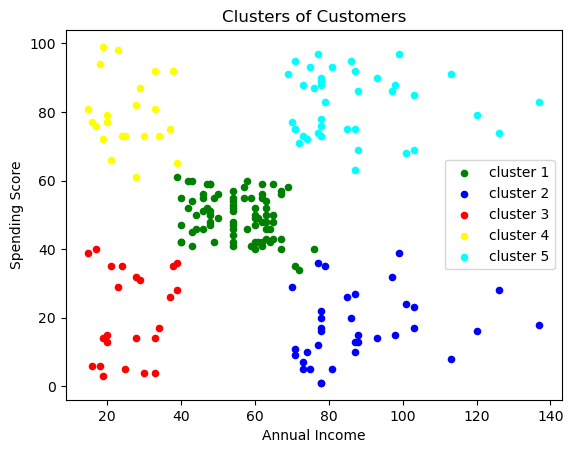

In [30]:
# Create scatter plot for each cluster

plt.scatter(df[A_S == 0]['Annual Income (k$)'], df[A_S == 0]['Spending Score (1-100)'], s=20, c='green', label='cluster 1')
plt.scatter(df[A_S == 1]['Annual Income (k$)'], df[A_S == 1]['Spending Score (1-100)'], s=20, c='blue', label='cluster 2')
plt.scatter(df[A_S == 2]['Annual Income (k$)'], df[A_S == 2]['Spending Score (1-100)'], s=20, c='red', label='cluster 3')
plt.scatter(df[A_S == 3]['Annual Income (k$)'], df[A_S == 3]['Spending Score (1-100)'], s=20, c='yellow', label='cluster 4')
plt.scatter(df[A_S == 4]['Annual Income (k$)'], df[A_S == 4]['Spending Score (1-100)'], s=20, c='aqua', label='cluster 5')

# Adding labels and title

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()


## Interpretation
* cluster 1 = Customers with moderate income and moderate spending scores
* cluster 2 = Customers with high income but low spending scores
* cluster 3 = Customers with low income and low spending scores
* cluster 4 = Customers with low income but high spending scores
* cluster 5 = Customers with high income and high spending scores

## Recommendations
* Cluster 1 = Offer mid-range products and regular promotions to encourage consistent spending.
* cluster 2 = Implement campaigns that highlight the value and benefits of higher-priced products
* cluster 3 = Focus on budget-friendly options and frequent discounts
* cluster 4 = Provide incentives for frequent purchases to keep them engaged.
* cluster 5 = Offer premium and exclusive products, personalized services, and VIP experiences.

# Multivariate Clustering Analysis

In [31]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group clusters  
0     youth      cl2  
1     youth      cl2  
2     youth      cl2  
3     youth      cl2  
4     youth      cl2

In [32]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_group', 'clusters'],
      dtype='object')

In [33]:
mall=data[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_group']]

In [34]:
mall.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group
0    Male   19                  15                      39     youth
1    Male   21                  15                      81     youth
2  Female   20                  16                       6     youth
3  Female   23                  16                      77     youth
4  Female   31                  17                      40     youth

In [35]:
cat_cols = ['Gender','Age_group']
encoder = LabelEncoder()
for cols in cat_cols:
    mall[f'{cols}_nums'] = encoder.fit_transform(mall[cols])

In [36]:
mall.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100) Age_group  \
0    Male   19                  15                      39     youth   
1    Male   21                  15                      81     youth   
2  Female   20                  16                       6     youth   
3  Female   23                  16                      77     youth   
4  Female   31                  17                      40     youth   

   Gender_nums  Age_group_nums  
0            1               2  
1            1               2  
2            0               2  
3            0               2  
4            0               2

In [37]:
df_mall= mall.drop(columns = cat_cols)
df_mall

Age  Annual Income (k$)  Spending Score (1-100)  Gender_nums  \
0     19                  15                      39            1   
1     21                  15                      81            1   
2     20                  16                       6            0   
3     23                  16                      77            0   
4     31                  17                      40            0   
..   ...                 ...                     ...          ...   
195   35                 120                      79            0   
196   45                 126                      28            0   
197   32                 126                      74            1   
198   32                 137                      18            1   
199   30                 137                      83            1   

     Age_group_nums  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
..              ...  
195               0  
196               0  
197               2  
198               2  
199               2  

[200 rows x 5 columns]

## Data Modeling

In [38]:
scale = StandardScaler()
scale_df = scale.fit_transform(df_mall)
df_mall = pd.DataFrame(data = scale_df, columns= df_mall.columns)

In [39]:
df_mall.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_nums  \
0 -1.424569           -1.738999               -0.434801     1.128152   
1 -1.281035           -1.738999                1.195704     1.128152   
2 -1.352802           -1.700830               -1.715913    -0.886405   
3 -1.137502           -1.700830                1.040418    -0.886405   
4 -0.563369           -1.662660               -0.395980    -0.886405   

   Age_group_nums  
0        1.026285  
1        1.026285  
2        1.026285  
3        1.026285  
4        1.026285

In [40]:
pca = PCA(n_components=2)
columns = ['col1','col2']
pca_df = pca.fit_transform(df_mall)
pca_df = pd.DataFrame(data = pca_df, columns=columns)

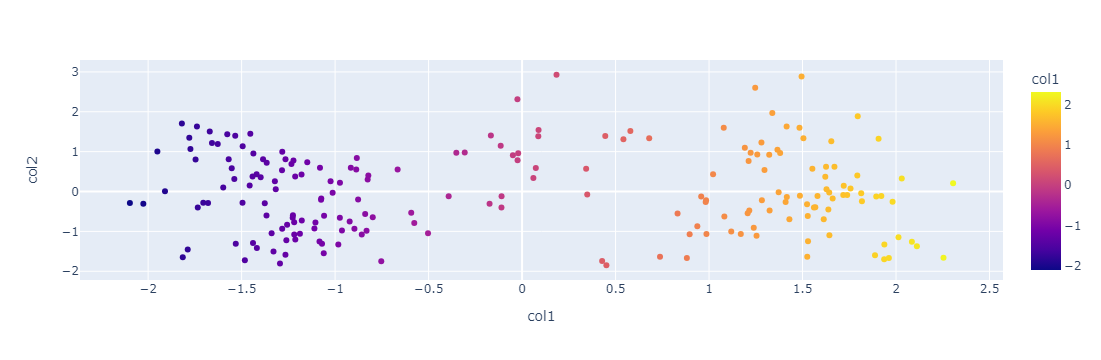

In [41]:
px.scatter(data_frame=pca_df, x = 'col1', y = 'col2', color ='col1')

In [42]:
# Calculate WCSS for different number of clusters
# WCSS = Within-Cluster Sum of Square

WCSS_mall = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    WCSS_mall.append(kmeans.inertia_)

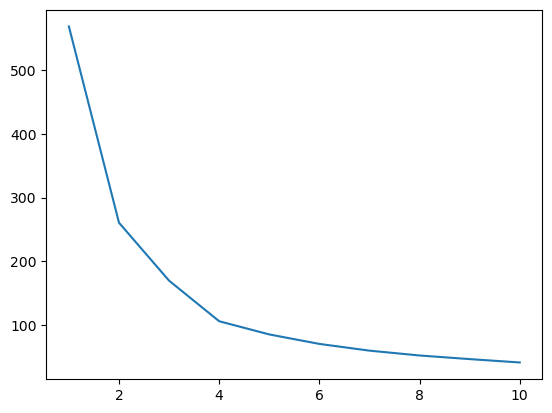

In [43]:
# chossing the number of clusters 
# plot an elbow graph

plt.plot(range(1, 11), WCSS_mall)

## Interpret the eblow graph and findings
* The number of clusters shows an elbow at 4 clusters
* Indicates that 4 clusters is the optimal number for segmenting the data

In [44]:
# Traning the KMeans Clustering Model

kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
mall = kmeans.fit_predict(pca_df)
print(mall)

[1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 0 1 0 1 2 1 2
 1 2 1 2 1 0 1 2 1 2 1 1 1 2 3 1 0 2 0 2 0 1 0 0 3 2 2 0 3 2 2 3 1 0 2 2 2
 0 3 2 0 1 2 0 0 0 2 1 0 2 1 1 2 2 3 0 2 1 3 2 1 0 3 1 2 0 3 0 1 2 0 0 0 0
 1 2 3 1 1 2 2 2 2 3 2 2 3 1 1 0 3 0 0 0 0 1 1 3 1 2 3 3 2 2 3 1 1 3 3 0 1
 1 3 0 3 2 2 2 1 0 1 3 1 2 1 3 1 0 2 0 1 2 3 0 3 0 3 0 1 0 3 0 3 0 1 0 1 0
 3 0 3 0 3 3 3 3 3 0 3 0 3 3 3]


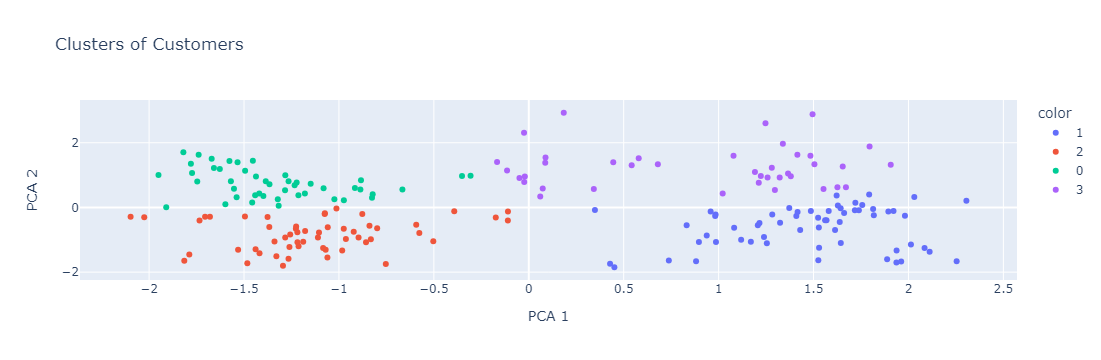

In [45]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = mall

# Create scatter plot for each cluster using Plotly

px.scatter(pca_df, x='col1', y='col2', color=pca_df['Cluster'].astype(str),
                 title='Clusters of Customers', labels={'col1': 'PCA 1', 'col2': 'PCA 2'})

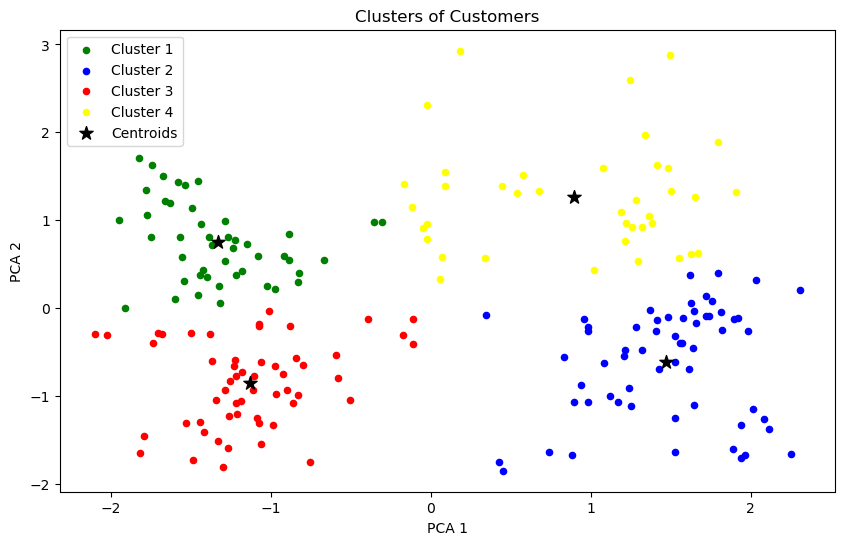

In [46]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = mall

# Create scatter plot for each cluster using plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Cluster'] == 0]['col1'], pca_df[pca_df['Cluster'] == 0]['col2'], s=20, c='green', label='Cluster 1')
plt.scatter(pca_df[pca_df['Cluster'] == 1]['col1'], pca_df[pca_df['Cluster'] == 1]['col2'], s=20, c='blue', label='Cluster 2')
plt.scatter(pca_df[pca_df['Cluster'] == 2]['col1'], pca_df[pca_df['Cluster'] == 2]['col2'], s=20, c='red', label='Cluster 3')
plt.scatter(pca_df[pca_df['Cluster'] == 3]['col1'], pca_df[pca_df['Cluster'] == 3]['col2'], s=20, c='yellow', label='Cluster 4')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='*', label='Centroids')

# Adding labels and title
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters of Customers')
plt.legend()
#plt.show()


In [47]:
# Assign cluster labels
data['clusters'] = ['cl1' if x == 1 else 'cl2' if x == 2 else
                    'cl3' if x == 3 else 'cl4' for x in mall]

In [48]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_group', 'clusters'],
      dtype='object')

# Spending Score

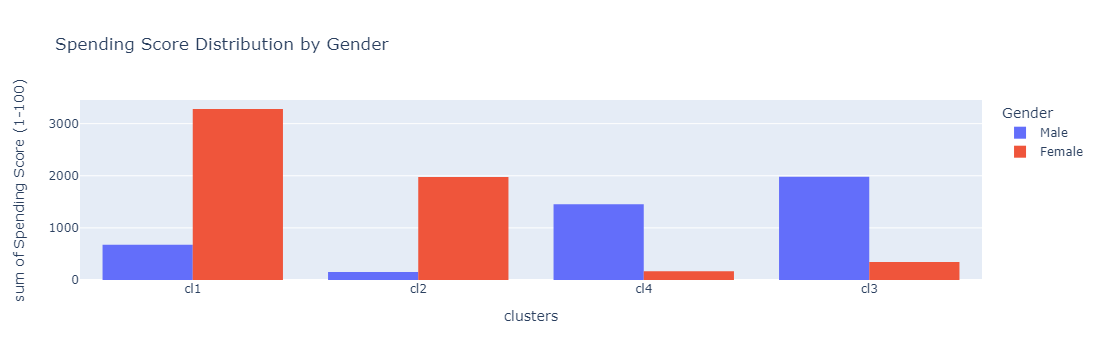

In [49]:
px.histogram(data, x='clusters', y='Spending Score (1-100)',color = 'Gender', barmode='group', 
                   title="Spending Score Distribution by Gender")

## Interpretation
* Cluster 1 and Cluster 2, Have a significantly higher number of female customers compared to males.
* Cluster 3 and Cluster 4, Have a significantly higher number of male customers compared to females.

## Recommendations
* In Cluster 1 and Cluster 2, Focus marketing campaigns and promotions on products and services that appeal to female customers.
* For Cluster 3 and Cluster 4, Develop marketing strategies that target male customers, offering products and services that cater to their interests.

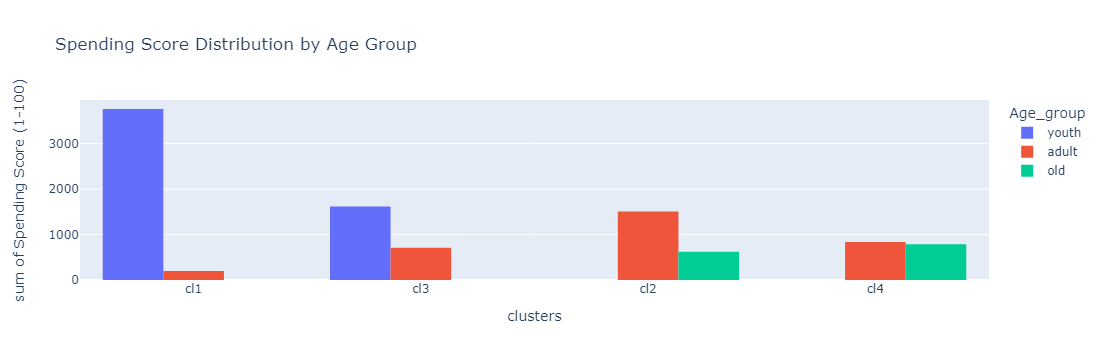

In [50]:
px.histogram(data, x='clusters', y='Spending Score (1-100)',color = 'Age_group', barmode='group', 
                   title="Spending Score Distribution by Age Group")

## Interpretation
* Cluster 1, Dominated by youth customers, indicating a younger with high spending scores.
* Cluster 3, Mostly youth but with a notable adult presence.
* Cluster 2, Adults with a significant number of older customers, indicating mature spending habits.
* Cluster 4, Balanced between adults and older customers, suggesting stable and mature spending patterns.

## Recommendations
* Cluster 1, Focus marketing efforts on products and services that appeal to young customers.
* Cluster 3, Develop marketing strategies that appeal to both youth and adults.
* Cluster 2, Target marketing towards adults and older customers.
* Cluster 4, Create campaigns that appeal to both adults and older customers.

# Annual Income 

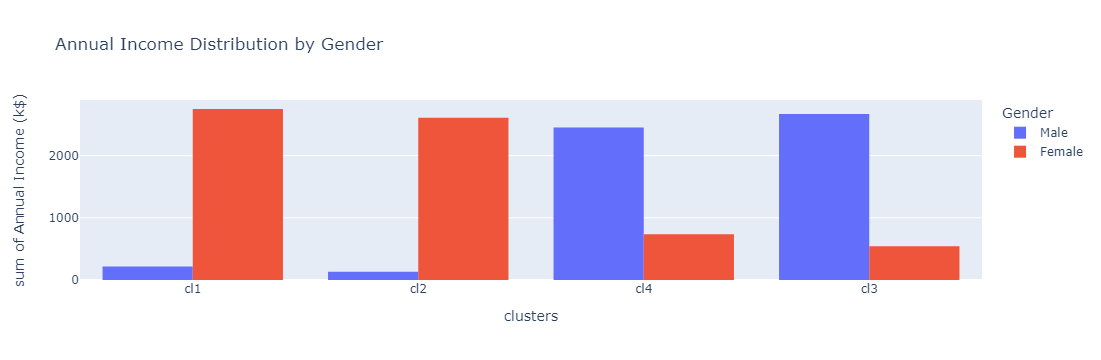

In [51]:
px.histogram(data, x='clusters', y='Annual Income (k$)',color = 'Gender', barmode='group', 
                   title="Annual Income Distribution by Gender")

## Interpretation
* Cluster 1 and Cluster 2 are dominated by female customers with high annual incomes
* Cluster 3 and Cluster 4 have a higher number of male customers with high annual incomes.

## Recommendations
* Cluster 1 and Cluster 2, Focus marketing on high-income female customers. And Promote luxury products, exclusive offers, and premium services that appeal to affluent women.
* Cluster 3 and Cluster 4, Target high-income male customers.And Highlight high-end products and services that cater to their interests.

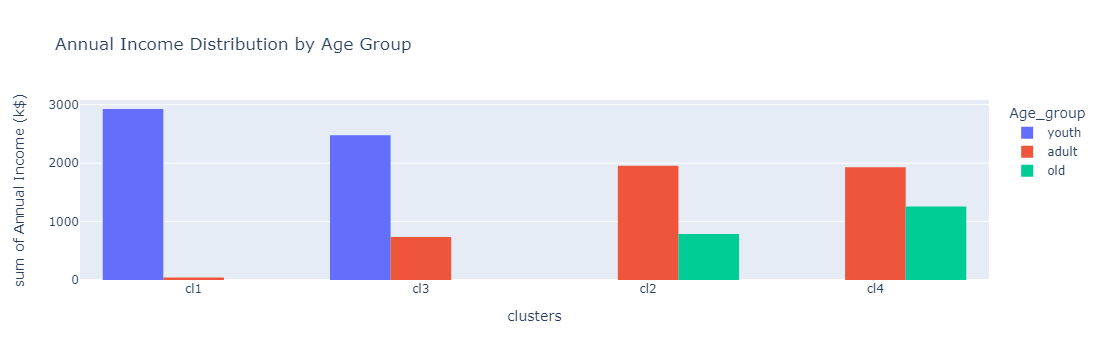

In [52]:
px.histogram(data, x='clusters', y='Annual Income (k$)',color = 'Age_group', barmode='group', 
                   title="Annual Income Distribution by Age Group")

## Interpretation
* Cluster 1 and Cluster 3 are dominated by youth customers with higher annual incomes.
* Cluster 2 and Cluster 4 have a mix of adult and older customers with moderate to high annual incomes.

## Recommendations
* Cluster 1 and Cluster 3 Target high-income youth customers and Promote trendy products
* Cluster 2 and Cluster 4 Develop marketing strategies for both adult and older customers and Offer a range of products and services that cater to different age preferences and lifestyles.

# Statistics Analysis

In [53]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group clusters  
0     youth      cl1  
1     youth      cl1  
2     youth      cl1  
3     youth      cl1  
4     youth      cl1

# Check relationship between income and spending score

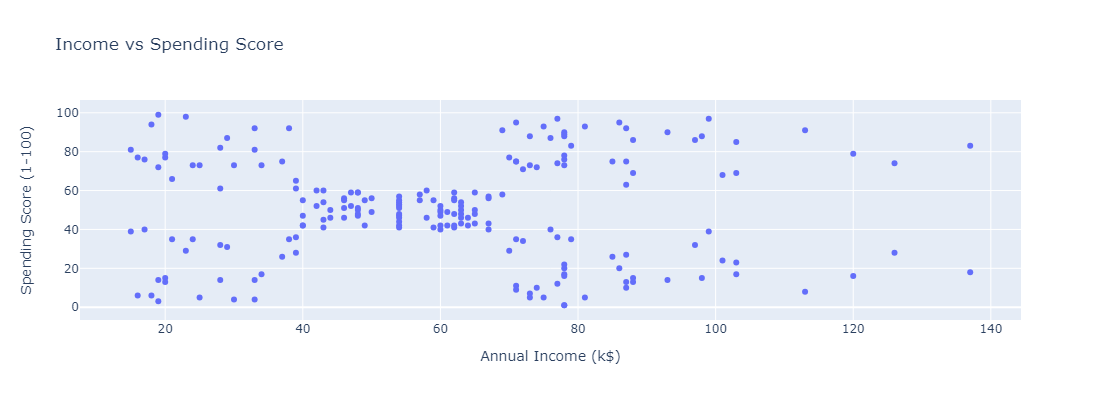

In [54]:
px.scatter(data_frame=data, x='Annual Income (k$)', y='Spending Score (1-100)',
           height=400, width=800, title='Income vs Spending Score')

In [55]:
data_corr = data [['Annual Income (k$)','Spending Score (1-100)']].corr(method='pearson')
data_corr

Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.009903
Spending Score (1-100)            0.009903                1.000000

In [56]:
data_corr_1 = data [['Age','Spending Score (1-100)']].corr(method='pearson')
data_corr_1

Age  Spending Score (1-100)
Age                     1.000000               -0.327227
Spending Score (1-100) -0.327227                1.000000

In [57]:
data_corr_2 = data [['Age','Annual Income (k$)']].corr(method='pearson')
data_corr_2

Age  Annual Income (k$)
Age                 1.000000           -0.012398
Annual Income (k$) -0.012398            1.000000

Text(0.5, 0.98, 'CORRELATION MATRIX')

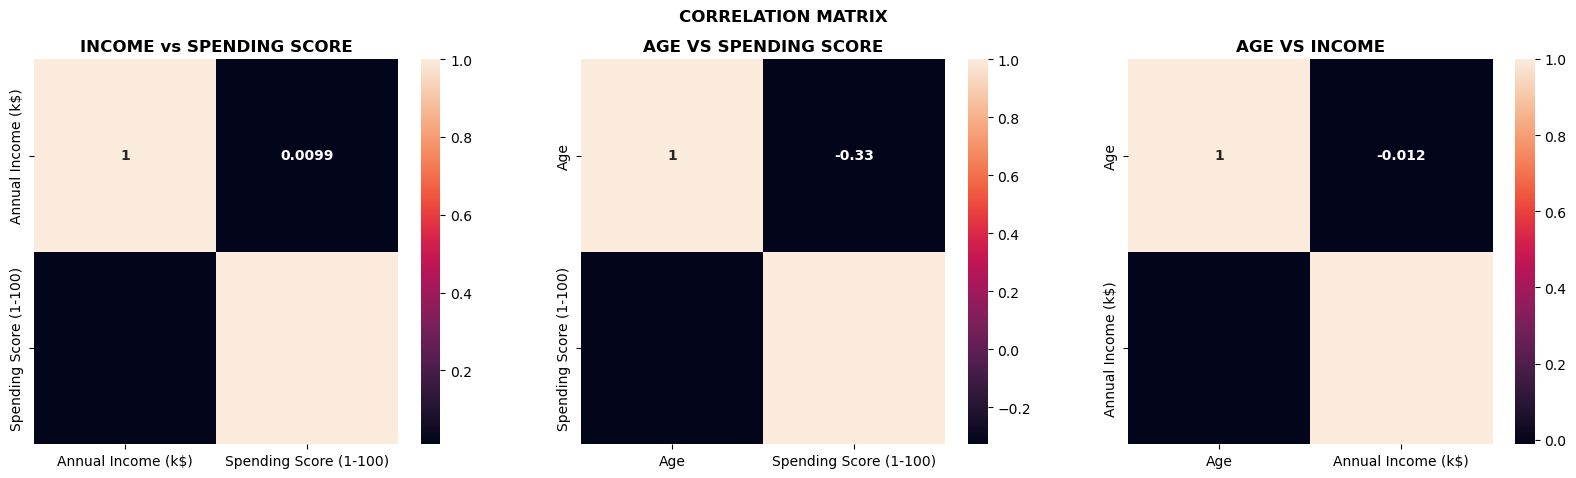

In [58]:
# fig the axes size and subplots
fig, axes = plt.subplots(1,3, figsize = (20, 5))

# define bold font
annot_kws = {"fontweight": "bold"}

# create heatmap
sns.heatmap(data=data_corr, annot=True, ax = axes[0], annot_kws = annot_kws)
sns.heatmap(data=data_corr_1, annot=True, ax = axes[1], annot_kws = annot_kws)
sns.heatmap(data=data_corr_2, annot=True, ax = axes[2], annot_kws=annot_kws)

# Set titles
axes[0].set_title('INCOME vs SPENDING SCORE',fontweight='bold')
axes[1].set_title('AGE VS SPENDING SCORE',fontweight='bold')
axes[2].set_title('AGE VS INCOME',fontweight='bold')

# set sup title
plt.suptitle('CORRELATION MATRIX',fontweight='bold')

## Interpretation of Correlation Results
### Annual Income vs. Spending Score
* Correlation Coefficient: 0.009903
* The correlation between annual income and spending score is very close to zero.
* There is no significant linear relationship between how much customers earn annually and their spending score.
* Customers with different income levels have similar spending scores.

### Age vs. Spending Score
* Correlation Coefficient: -0.327227
* These indicate a weak negative relationship.
* As age decreases, the spending score decreases weakly.

### Age vs. Annual Income:
* Correlation Coefficient: -0.012398
* The correlation between age and annual income is very close to zero, but negative.
* There is no significant linear relationship between age and annual income.
* Customers of different ages have similar annual incomes

# Hypothesis Test

## check Assumptions of correlation before perform the Hypothesis Test
* Linearity : use scatter chart to check the Linearity
* Absense of outliner : use box polt to check the outliner
* Normality use histogram to check the Normality
* Continuous Variable
### Note
* Linerity : There must be a linear relationship between variables.
* 
Absense of outliner : There must not be Outline
* 
Normality : There must ba e normal distributiopattern.
* Continuous Variable : It must be continuous variable

In [59]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_group', 'clusters'],
      dtype='object')

Text(0.5, 0.98, 'NORMALITY AND OUTLINER DETECTION')

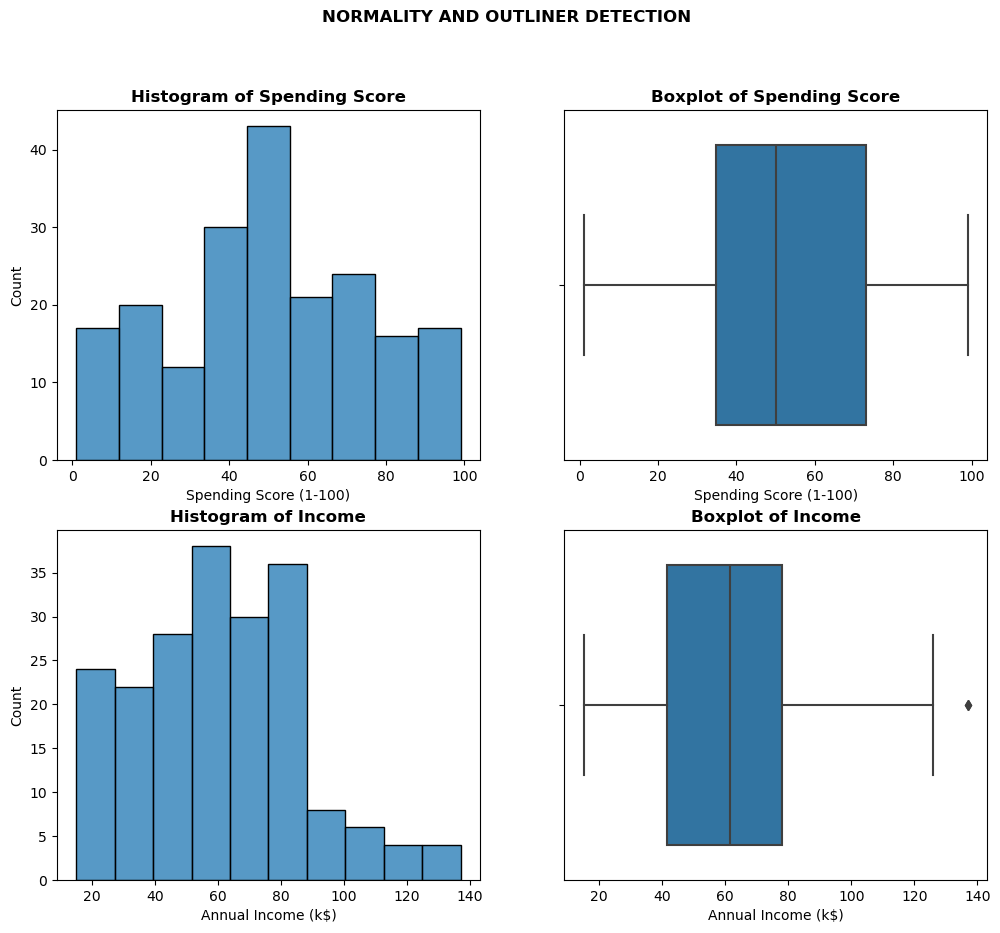

In [60]:
# fig the axes size and subplots
fig, axes = plt.subplots(2,2, figsize = (12, 10))

# plot your charts
sns.histplot(data=data, x="Spending Score (1-100)", ax= axes[0,0])
sns.boxplot(data=data, x="Spending Score (1-100)", ax= axes[0,1])
sns.histplot(data=data, x="Annual Income (k$)", ax= axes[1,0])
sns.boxplot(data=data, x="Annual Income (k$)", ax= axes[1,1])

# Set titles
axes[0,0].set_title('Histogram of Spending Score',fontweight='bold')
axes[0,1].set_title('Boxplot of Spending Score',fontweight='bold')
axes[1,0].set_title('Histogram of Income',fontweight='bold')
axes[1,1].set_title('Boxplot of Income',fontweight='bold')

# set sup title
plt.suptitle('NORMALITY AND OUTLINER DETECTION',fontweight='bold')

Text(0.5, 1.0, 'LINERITY DETECTION')

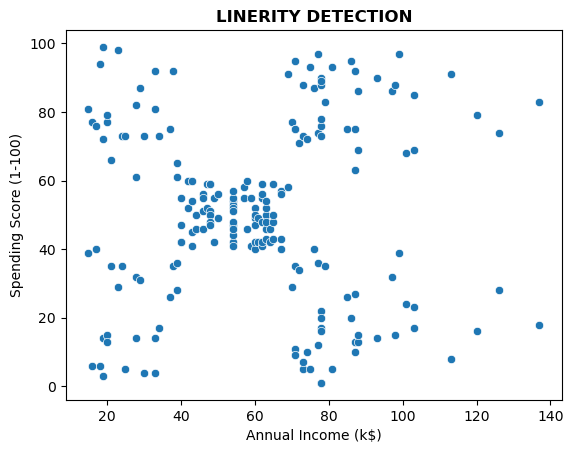

In [61]:
# create a scatter chart to check linerity

sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title('LINERITY DETECTION',fontweight='bold')

## Interpretation of Assumption Checking
* After checking the assumptions for correlation, we found that only the continuous variable assumption is met

## Why Use the Chi-Square Test
* Our data does not meet the assumptions for a parametric test
* We use a non-parametric test. (The chi-square test )

# CHI SQUARE TEST OF ASSOCIATION

### Convert Spending Score and Annual Income Columns to categoric variables 
### Because chi Square Test two categoric variables

In [62]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [63]:
# convert annual income and spending score to categoric variable

data['income_level']=['low' if x <=50 else 'medium' if x <=85 else 'high' 
                      if x <=120 else 'veryHigh' for x in data['Annual Income (k$)']]
data['spending_level']=['low' if x <=25 else 'medium' if x <=50 else 'high' 
                        if x <=75 else 'VeryHigh' for x in data['Spending Score (1-100)']]
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group clusters income_level spending_level  
0     youth      cl1          low         medium  
1     youth      cl1          low       VeryHigh  
2     youth      cl1          low            low  
3     youth      cl1          low       VeryHigh  
4     youth      cl1          low         medium

In [64]:
# convert your table to contingency table

data_chi =pd.crosstab(data['income_level'],data['spending_level'])
data_chi

spending_level  VeryHigh  high  low  medium
income_level                               
high                  10     5   12       3
low                   13    25   12      24
medium                14    28   14      36
veryHigh               1     1    1       1

In [65]:
# create a decision rule function

def decision(p_value,alpha,x,y):
    Ho = (f'There is no significant relationship between {x} and {y}')
    H1 = (f'There is significant relationship between {x} and {y}')
    
    print(f'The p value is :{p_value}')
    if p_value < alpha:
        return H1
    else:
        return Ho

In [66]:
# perfrom chi square test

stats.chi2_contingency(data_chi)

Chi2ContingencyResult(statistic=20.149037242779972, pvalue=0.017014590548055354, dof=9, expected_freq=array([[ 5.7 ,  8.85,  5.85,  9.6 ],
       [14.06, 21.83, 14.43, 23.68],
       [17.48, 27.14, 17.94, 29.44],
       [ 0.76,  1.18,  0.78,  1.28]]))

In [67]:
# unpack the result and make decision

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_chi)

# make decision

decision(p_value = chi_pvalue, alpha = 0.05, x ='income_level', y ='spending_level')

The p value is :0.017014590548055354


'There is significant relationship between income_level and spending_level'

### chi-square finding
* The p-value of 0.017 means there is a significant relationship between income levels and spending levels
* This finding is statistically significant
* This indicating that how much someone earns is associated with how much they spend

# Check if Gender contribute to income level and spending level

## Income level

In [68]:
# convert your table to contingency table

data_income = pd.crosstab(data['Gender'], data['income_level'])
data_income

income_level  high  low  medium  veryHigh
Gender                                   
Female          16   45      50         1
Male            14   29      42         3

In [69]:
# perfrom chi square test

stats.chi2_contingency(data_income)

Chi2ContingencyResult(statistic=2.443633286024592, pvalue=0.4855639851216681, dof=3, expected_freq=array([[16.8 , 41.44, 51.52,  2.24],
       [13.2 , 32.56, 40.48,  1.76]]))

In [70]:
# unpack the result and make decision

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_income)

# make decision

decision(p_value = chi_pvalue, alpha = 0.05, x ='Gender', y ='income_level')

The p value is :0.4855639851216681


'There is no significant relationship between Gender and income_level'

### Finding Interpretation
* The p-value of 0.485 means there is no significant relationship between gender and income level.
* This indicates that gender alone is not a strong predictor of income level 

## Spending level

In [71]:
# convert your table to contingency table

data_spending = pd.crosstab(data['Gender'], data['spending_level'])
data_spending

spending_level  VeryHigh  high  low  medium
Gender                                     
Female                23    30   17      42
Male                  15    29   22      22

In [72]:
# perfrom chi square test

stats.chi2_contingency(data_spending)

Chi2ContingencyResult(statistic=5.795642572934051, pvalue=0.12198718385168848, dof=3, expected_freq=array([[21.28, 33.04, 21.84, 35.84],
       [16.72, 25.96, 17.16, 28.16]]))

In [73]:
# unpack the result and make decision

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_spending)

# make decision

decision(p_value = chi_pvalue, alpha = 0.05, x ='Gender', y ='spending_level')

The p value is :0.12198718385168848


'There is no significant relationship between Gender and spending_level'

### Finding Interpretation
* The p-value of 0.122 indicates there is no significant relationship between gender and spending level. 
* This means gender is not a decisive factor in determining how much someone spends. 
* These findings indicate that spending habits are not strongly influenced by gender alone 

# Check if Age contribute to income level and spending level

## Spending level

In [74]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age_group clusters income_level spending_level  
0     youth      cl1          low         medium  
1     youth      cl1          low       VeryHigh  
2     youth      cl1          low            low  
3     youth      cl1          low       VeryHigh  
4     youth      cl1          low         medium

In [75]:
# convert your table to contingency table

data_age_s =pd.crosstab(data['Age_group'],data['spending_level'])
data_age_s

spending_level  VeryHigh  high  low  medium
Age_group                                  
adult                 11    13   17      32
old                    0    12   12      14
youth                 27    34   10      18

In [76]:
# perfrom chi square test

stats.chi2_contingency(data_age_s)

Chi2ContingencyResult(statistic=33.38526280481358, pvalue=8.839390878537975e-06, dof=6, expected_freq=array([[13.87 , 21.535, 14.235, 23.36 ],
       [ 7.22 , 11.21 ,  7.41 , 12.16 ],
       [16.91 , 26.255, 17.355, 28.48 ]]))

In [77]:
# unpack the result and make decision

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_age_s)

# make decision

decision(p_value = chi_pvalue, alpha = 0.05, x ='Age_group', y ='spending_level')

The p value is :8.839390878537975e-06


'There is significant relationship between Age_group and spending_level'

## Finding interpretation
* The p-value (8.84e-06) indicates a significant relationship between age group and spending level. 
* These data strongly mean that a person's age group is closely linked to how much they spend. 
* This finding is statistically significant, That different age groups exhibit distinct spending behaviors.

## Income level

In [78]:
# convert your table to contingency table

data_age_i = pd.crosstab(data['Age_group'],data['income_level'])
data_age_i

income_level  high  low  medium  veryHigh
Age_group                                
adult           14   22      36         1
old              4   19      15         0
youth           12   33      41         3

In [79]:
# perfrom chi square test

stats.chi2_contingency(data_age_i)

Chi2ContingencyResult(statistic=6.42564559713964, pvalue=0.37723402930278477, dof=6, expected_freq=array([[10.95, 27.01, 33.58,  1.46],
       [ 5.7 , 14.06, 17.48,  0.76],
       [13.35, 32.93, 40.94,  1.78]]))

In [80]:
# unpack the result and make decision

chi_stats, chi_pvalue, dof, expected_freq = stats.chi2_contingency(data_age_i)

# make decision

decision(p_value = chi_pvalue, alpha = 0.05, x ='Age_group', y ='income_level')

The p value is :0.37723402930278477


'There is no significant relationship between Age_group and income_level'

## Finding interpretation
* The p-value of 0.377 suggests that there is no significant relationship between age group and income level. 
* These data do not show a meaningful connection between someone's age group and their income level. 
* This finding indicates that age group alone is not a strong predictor of income level

## Recommendations on the analysis

#### Targeted Marketing 
* Develop targeted marketing strategies based on age groups rather than gender or income alone.
* Age group has a significant impact on spending behavior, 
* Tailoring campaigns to different age demographics can lead to more effective results.

#### Customer Segmentation 
* Use clustering techniques to group customers based on their spending habits and preferences. 
* Create personalized experiences and promotions that resonate with each customer segment.

#### Product Placement 
* Place products strategically based on spending patterns. 
* For example, high-spending age groups could be targeted with premium products. 
* while moderate spenders might respond well to value propositions.

#### Promotional Campaigns
* Design promotions and offers that appeal to specific age groups. 
* Consider offering discounts or incentives that align with the spending behavior of each age demographic.

#### Continuous Monitoring
* Continuously monitor customer behavior and adjust strategies accordingly. 
